In [1]:


# Import core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import warnings

# Machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
)
from xgboost import XGBClassifier

# Model selection & tuning
from sklearn.model_selection import train_test_split, GridSearchCV

# Evaluation metrics
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, accuracy_score, 
    precision_score, recall_score, f1_score, roc_auc_score
)

# Feature selection
from sklearn.feature_selection import RFE, SelectKBest, f_classif

# Sampling methods
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Pipelines
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline as SklearnPipeline



In [2]:
pip install ucimlrepo

  Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: '/usr/local/lib/python3.11/aims/lib/python3.11/site-packages/ucimlrepo'
Check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd

df = pd.read_csv('/home/amukelani/Documents/notebooks/Diabetes Dataset/diabetes_binary_health_indicators_BRFSS2015.csv')
df.head(10)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [8]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [9]:
# Check if there are missing values

df.isna().sum() # no missing values



Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [10]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


Modify the Diabetes Classification

The dataset "diabetes_binary_health_indicators_BRFSS2015.csv" assigns pre-diabetes as non-diabets (Diabetes_binary = 0), as we can see in the Diabetes Health Indicators Dataset Notebook . However, since individuals with pre-diabetes have a higher risk of developing diabetes, it is reasonable to consider pre-diabetes as diabetes in the binary classification. Hence, I created a new dataset that classifies pre-diabetes as diabetes (Diabetes_binary = 1)


In [12]:
# Check the target variables of the original dataset
# 0 is for no diabetes or only during pregnancy, 
# 1 is for pre-diabetes or borderline diabetes, 
# and 2 is for yes diabetes
# Replace 'Diabetes_binary' with the actual column name from df.columns
print(df['Diabetes_binary'].value_counts().sort_index())

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64


In [13]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [14]:
# Create two lists 
# one containing the names of columns with binary variables 
# and the other with the remaing columns
    
target = 'Diabetes_binary'

binary_col = [
    col for col in df.columns
    if df[col].nunique() == 2 and col != target
]

num_col = [
    col for col in df.columns.difference(binary_col) 
    if col != target
]

print('Binary Columns: ', binary_col)
print('Numerical Columns: ', num_col)

Binary Columns:  ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
Numerical Columns:  ['Age', 'BMI', 'Education', 'GenHlth', 'Income', 'MentHlth', 'PhysHlth']


In [15]:
print(df[target].value_counts().sort_index())
print()
print(df[target].value_counts(normalize=True).sort_index().map(lambda x: f'{x: .3%}'))

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

Diabetes_binary
0.0     86.067%
1.0     13.933%
Name: proportion, dtype: object


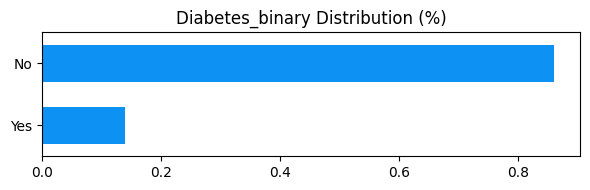

In [17]:

import pandas as pd
import matplotlib.pyplot as plt
# Define a function to plot a bar chat of diabetes
def plot_barchart_diabetes(df, col=target):
    ratios = df[col].value_counts(normalize=True).sort_index()
    labels = ['No', 'Yes']
    y_pos = [0.75, 0.25]
    
    plt.figure(figsize=(6, 2))
    plt.barh(y_pos, ratios, height=0.3, color='#0D92F4')
    plt.yticks(y_pos, labels)
    plt.title(f'{col} Distribution (%)')
    
    plt.ylim(0, 1)
    
    plt.tight_layout()
    plt.show()

# Diplay the distribution of Diabetes_binary as a bar chart
plot_barchart_diabetes(df)    



In [18]:
# Overview of the binary variables
for col in binary_col:
    print(df[col].value_counts(sort=False).sort_index())
    print()

HighBP
0.0    144851
1.0    108829
Name: count, dtype: int64

HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64

CholCheck
0.0      9470
1.0    244210
Name: count, dtype: int64

Smoker
0.0    141257
1.0    112423
Name: count, dtype: int64

Stroke
0.0    243388
1.0     10292
Name: count, dtype: int64

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

PhysActivity
0.0     61760
1.0    191920
Name: count, dtype: int64

Fruits
0.0     92782
1.0    160898
Name: count, dtype: int64

Veggies
0.0     47839
1.0    205841
Name: count, dtype: int64

HvyAlcoholConsump
0.0    239424
1.0     14256
Name: count, dtype: int64

AnyHealthcare
0.0     12417
1.0    241263
Name: count, dtype: int64

NoDocbcCost
0.0    232326
1.0     21354
Name: count, dtype: int64

DiffWalk
0.0    211005
1.0     42675
Name: count, dtype: int64

Sex
0.0    141974
1.0    111706
Name: count, dtype: int64



In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch  # Add this import

# Define function for creating a pie chart for binary variables

def binary_var_pie(var):
    
    # Group the data
    grouped = df.groupby([target, var]).size().unstack()
    
    # Label the binary variable to blue if No, red if Yes
    labels = ['No', 'Yes']
    colors = ['#0D92F4', '#C62E2E']
    
    # Create space (1 row * 2 columns) for pie charts
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    
    # Pie chart for no diabetes
    axes[0].pie(grouped.iloc[0], colors=colors, autopct='%.1f%%', startangle=90)
    axes[0].set_xlabel('No Diabetes', fontsize=10, labelpad=2)
    
    # Pie chart for diabetes
    axes[1].pie(grouped.iloc[1], colors=colors, autopct='%.1f%%', startangle=90)
    axes[1].set_xlabel('Diabetes', fontsize=10, labelpad=2)
    
    # Add a main title
    plt.suptitle(f'{var} Distribution (%)', fontsize=14, fontweight='bold')
    
    # Create a legend elements
    legend_elements = [
        Patch(facecolor=colors[0], label=labels[0]),
        Patch(facecolor=colors[1], label=labels[1])
    ]
    
    # Add a legend
    fig.legend(
        handles=legend_elements,
        loc='upper right',
        bbox_to_anchor=(1, 0.95),
        frameon=False
    )

    # Add a box around the entire figure
    fig.patch.set_edgecolor('black')
    fig.patch.set_linewidth(1)
    
    plt.tight_layout(pad=1.3)
    plt.show()


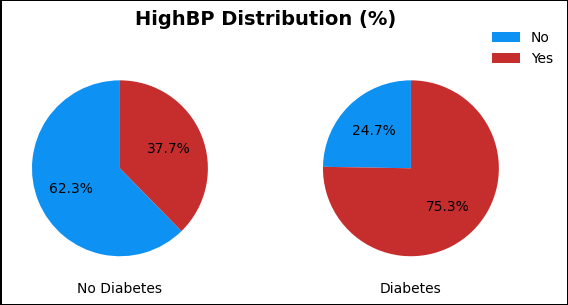

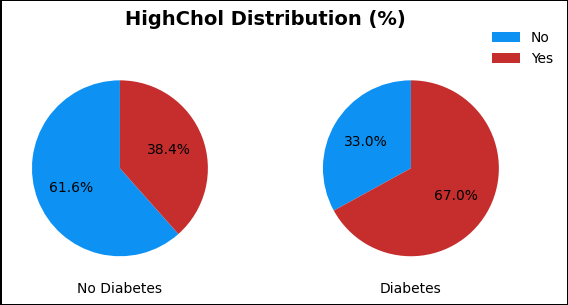

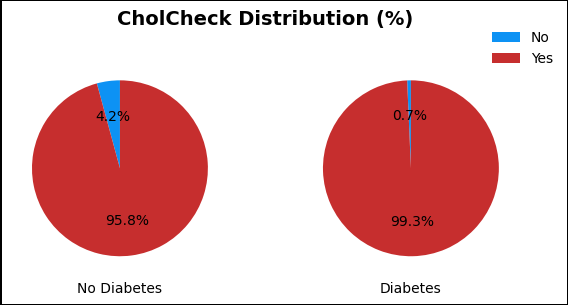

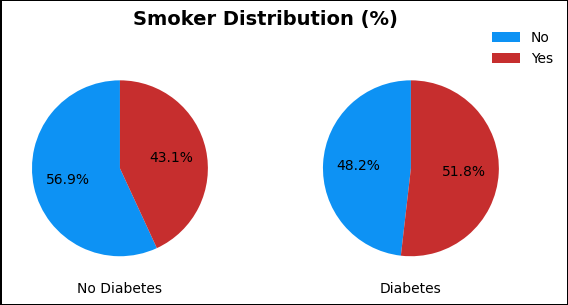

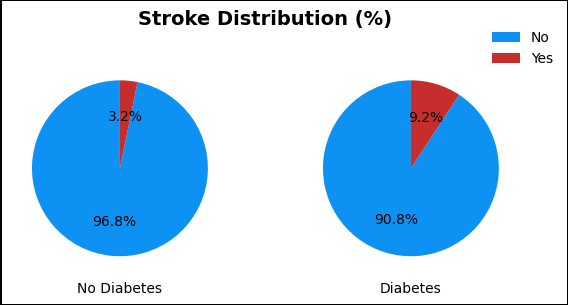

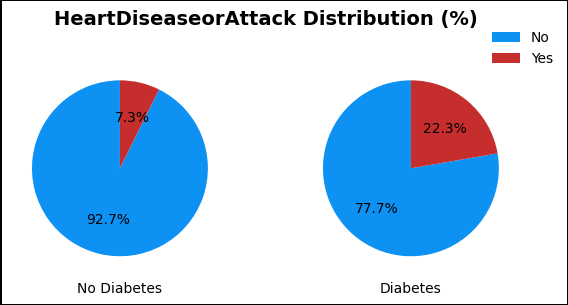

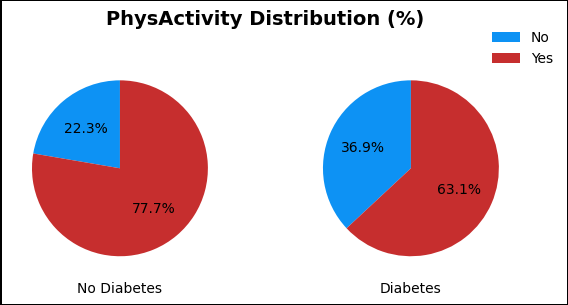

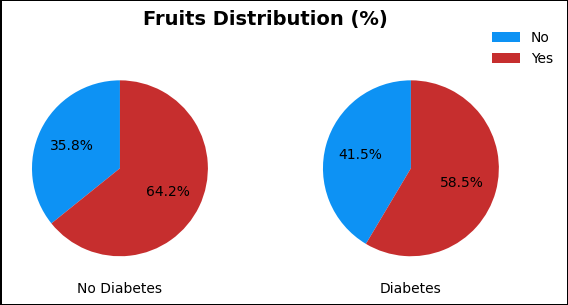

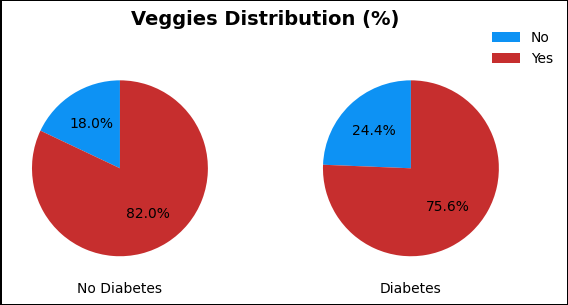

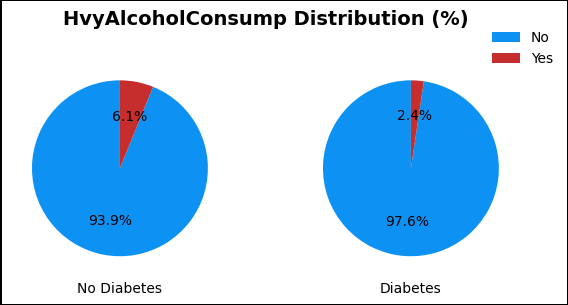

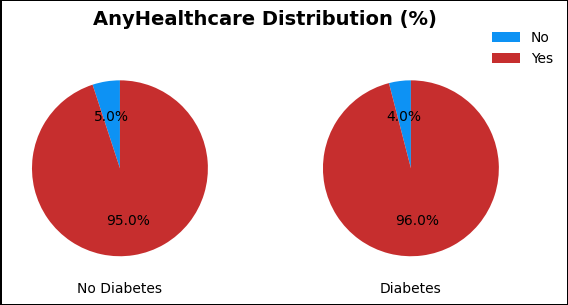

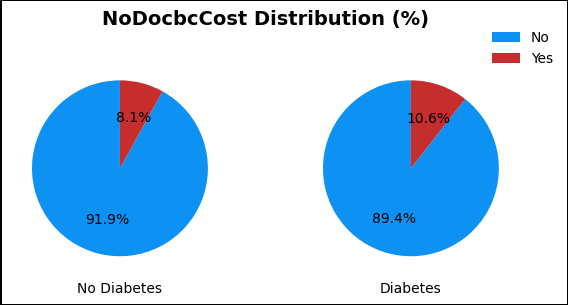

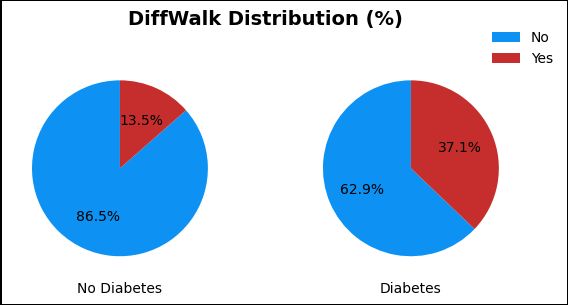

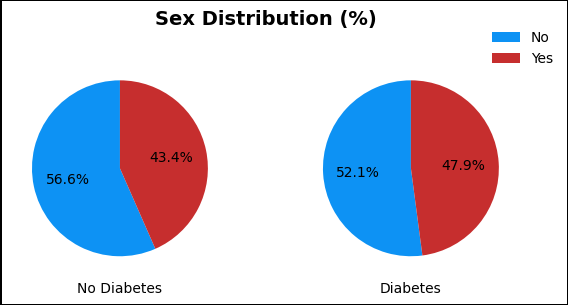

In [26]:
for col in binary_col:
    binary_var_pie(col)

In [27]:
# Overview of the numerical variables (1) : Number of unique values
print(f'Number of unique values:')
print(df[num_col].nunique())



Number of unique values:
Age          13
BMI          84
Education     6
GenHlth       5
Income        8
MentHlth     31
PhysHlth     31
dtype: int64


In [28]:


# Overview of the numerical variables (2): Mean values for No Diabetes and Diabetes Groups
for col in num_col:
    print(f'<Mean values of {col}>')
    print(df.groupby(target)[col].mean())
    print()



<Mean values of Age>
Diabetes_binary
0.0    7.814065
1.0    9.379053
Name: Age, dtype: float64

<Mean values of BMI>
Diabetes_binary
0.0    27.805770
1.0    31.944011
Name: BMI, dtype: float64

<Mean values of Education>
Diabetes_binary
0.0    5.099797
1.0    4.745516
Name: Education, dtype: float64

<Mean values of GenHlth>
Diabetes_binary
0.0    2.385185
1.0    3.290981
Name: GenHlth, dtype: float64

<Mean values of Income>
Diabetes_binary
0.0    6.190474
1.0    5.210094
Name: Income, dtype: float64

<Mean values of MentHlth>
Diabetes_binary
0.0    2.978034
1.0    4.461806
Name: MentHlth, dtype: float64

<Mean values of PhysHlth>
Diabetes_binary
0.0    3.641082
1.0    7.954479
Name: PhysHlth, dtype: float64



In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Define function for creating a histogram for numerical variable

def num_var_line(var):

    # Count the number of unique values
    num_unique_vals = df[var].nunique()
    
    # Seperate numerical variables by diabetes status
    num_var_no = df[df[target] == 0][var]
    num_var_yes = df[df[target] == 1][var]
    
    # Create plot space
    plt.figure(figsize=(5, 3))
    
    # Plot histogram for no diabetes and diabetes
    # while suppressing future warning
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        sns.histplot(num_var_no, stat='density',
                     bins=range(1, num_unique_vals+2),
                     label='No Diabetes',
                     color='#0D92F4',
                     linewidth=1.2,
                     element='step',
                     fill=False
                    )
        sns.histplot(num_var_yes, stat='density',
                     bins=range(1, num_unique_vals+2),
                     label='Diabetes',
                     color='#C62E2E',
                     linewidth=1.2,
                     element='step',
                     fill=False
                    )
    
    # Format the plot
    plt.title(f'{var} Distribution', fontsize=14)
    plt.xlabel(var, fontsize=10)
    plt.ylabel('Density', fontsize=10)
    
    # Remove top and right spines
    plt.gca().spines[['top', 'right']].set_visible(False)
    
    # Add grid lines and legend
    plt.grid(axis='both', linestyle=':', alpha=0.5)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

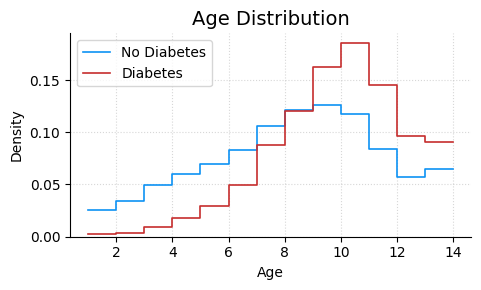

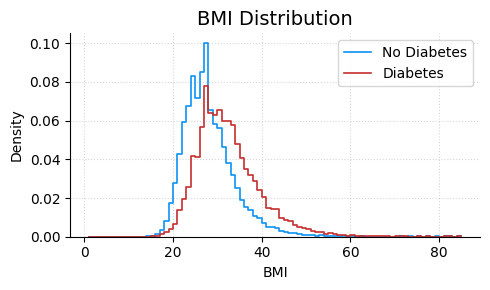

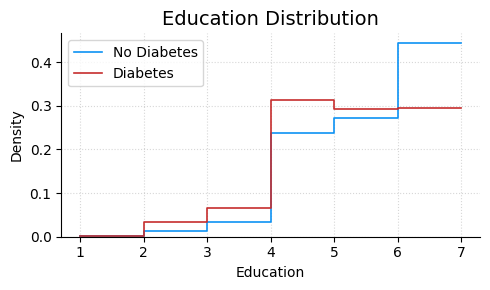

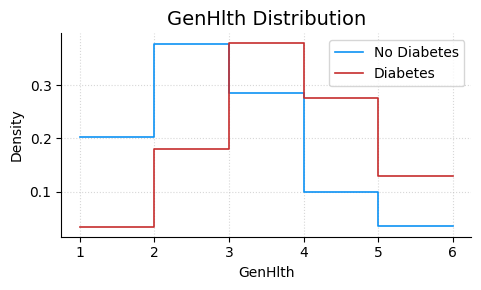

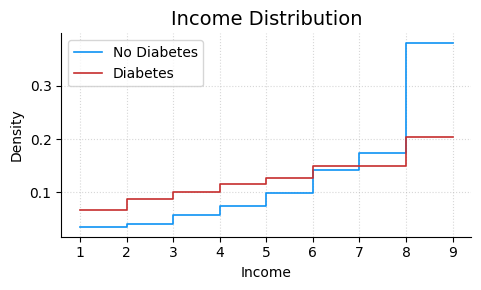

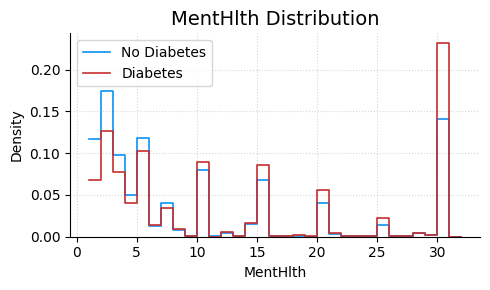

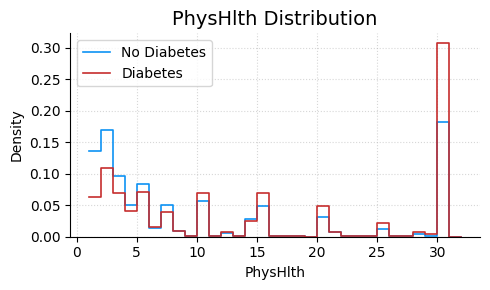

In [32]:
for col in num_col:
    num_var_line(col)

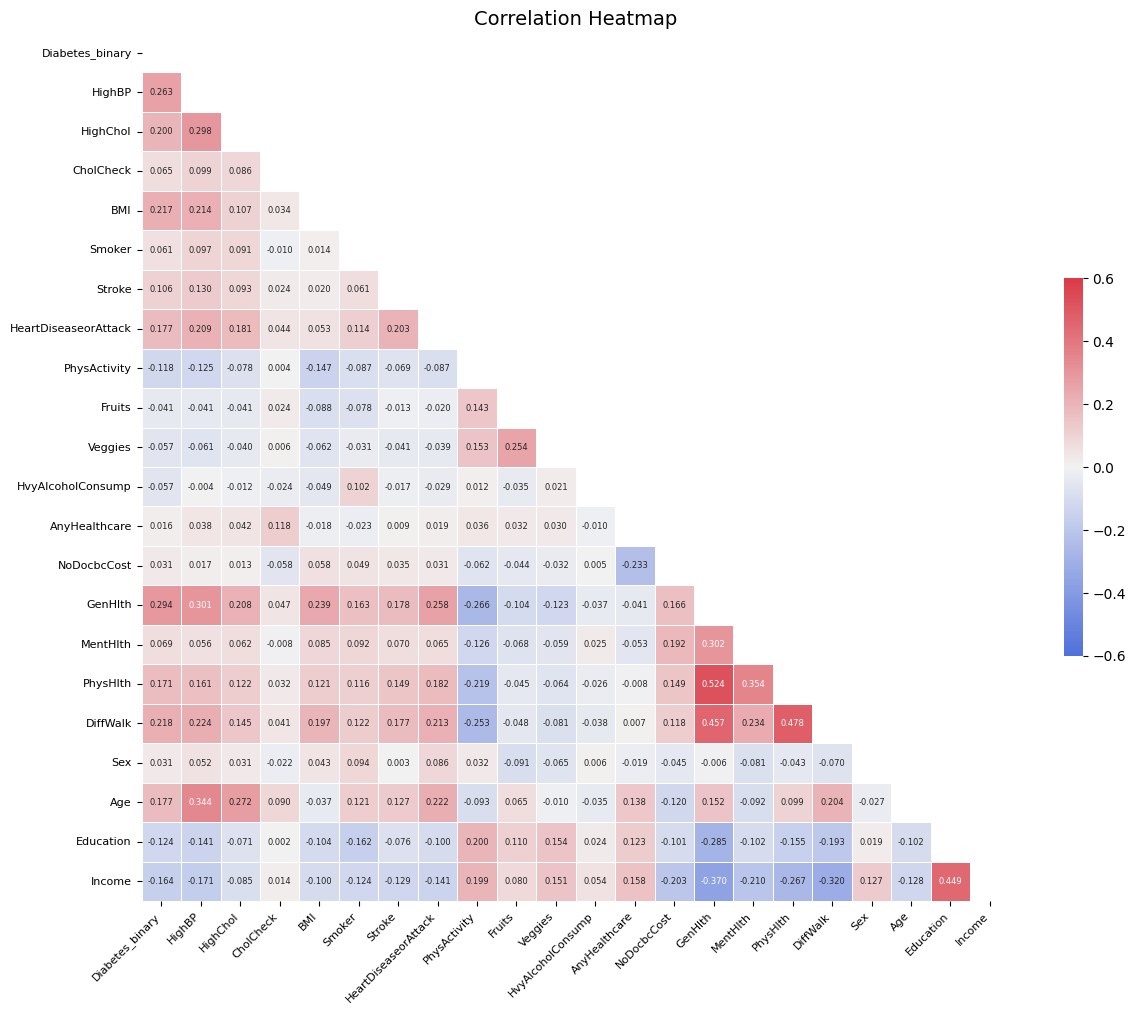

In [35]:

import numpy as np
# Correlations between variables

# Generate a correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up plot figure
f, ax = plt.subplots(figsize=(14, 14))

# Generate a diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the upper diagonal removed
# and the values displayed in the cells
heatmap = sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    annot=True,
    annot_kws={"size": 6},
    fmt='.3f',
    vmax=0.6,
    vmin=-0.6,
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.35}
)

# Set title
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 14})
ax.tick_params(axis='both', labelsize=8)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right');


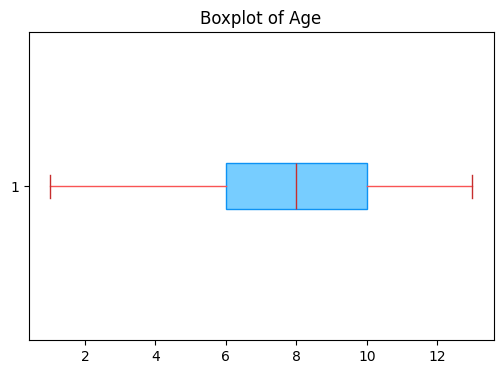

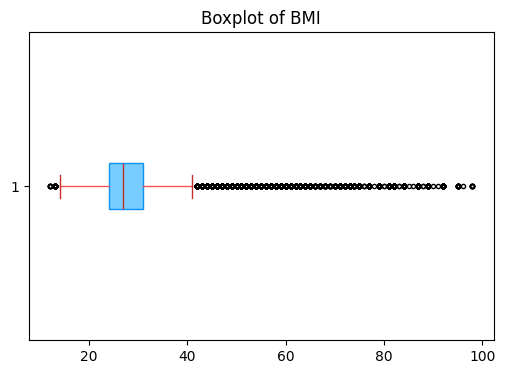

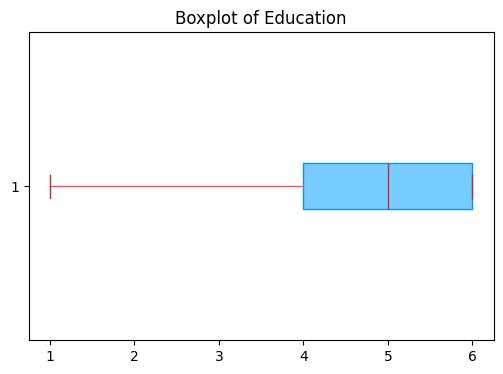

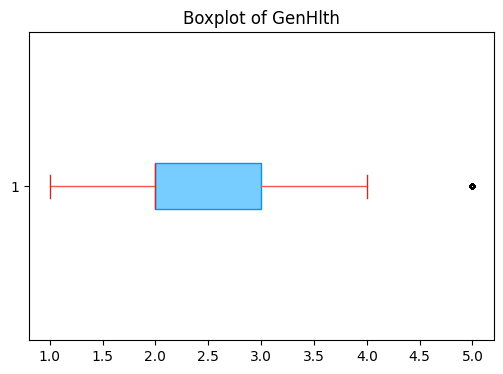

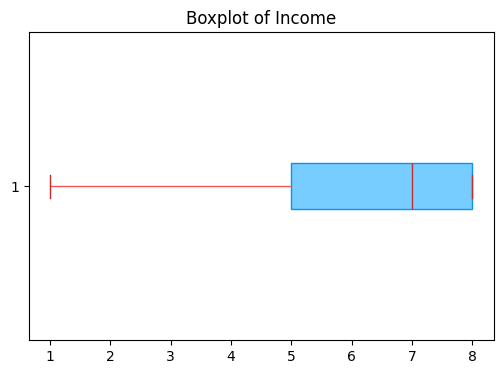

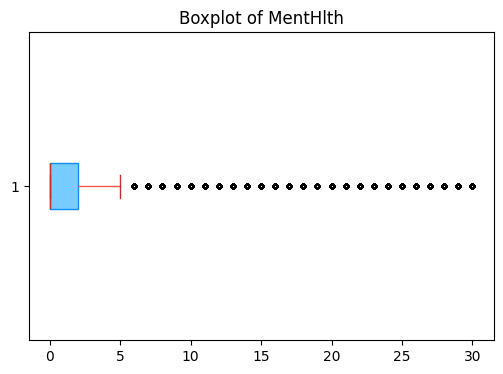

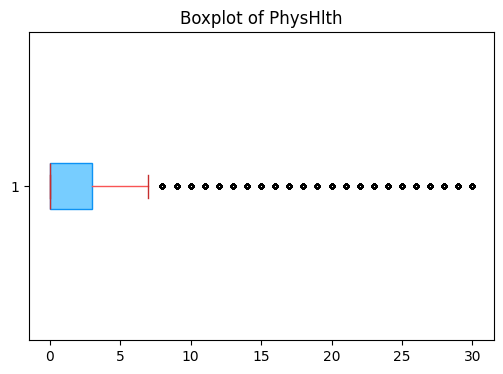

In [36]:
# Define function for creating boxplot
def plot_boxplot(df, col):
    plt.figure(figsize=(6, 4))
    plt.boxplot(
        df[col], 
        vert=False,
        patch_artist=True,
        boxprops=dict(facecolor='#77CDFF', color='#0D92F4'),
        medianprops=dict(color='#C62E2E'),
        whiskerprops=dict(color='#F95454'),
        capprops=dict(color='#C62E2E'),
        flierprops=dict(marker='o', color='#536493', markersize=3)
    )
    plt.title(f'Boxplot of {col}')

# Boxplot of numerical variables
for col in num_col:
    plot_boxplot(df, col)

In [37]:
# Define a function to find outliers in a given column
def find_outliers_iqr(df, col, k=1.5):

    # Set the lower quartile and the upper quartile
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Set the lower bound and upper bound
    # based on IQR and parameter k
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Filter only outlier rows
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    return outliers

# Return rows where BMI is an outlier
df_outlier_bmi = find_outliers_iqr(df, 'BMI')
df_outlier_bmi

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
85,1.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,2.0,30.0,1.0,0.0,9.0,6.0,8.0
97,0.0,1.0,0.0,1.0,45.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,4.0,6.0
156,1.0,1.0,1.0,1.0,47.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,6.0,5.0
188,0.0,1.0,0.0,1.0,43.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,7.0,1.0,0.0,10.0,5.0,2.0
201,1.0,1.0,1.0,1.0,55.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,15.0,0.0,0.0,11.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253547,0.0,1.0,1.0,1.0,44.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,4.0,14.0,30.0,0.0,0.0,3.0,6.0,1.0
253557,0.0,1.0,1.0,1.0,42.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,10.0,20.0,1.0,0.0,6.0,4.0,1.0
253567,0.0,1.0,1.0,1.0,44.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,3.0,0.0,0.0,1.0,1.0,11.0,2.0,1.0
253673,0.0,1.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,14.0,4.0,0.0,1.0,3.0,6.0,8.0


Lower Bound: 13.5
Upper Bound: 41.5


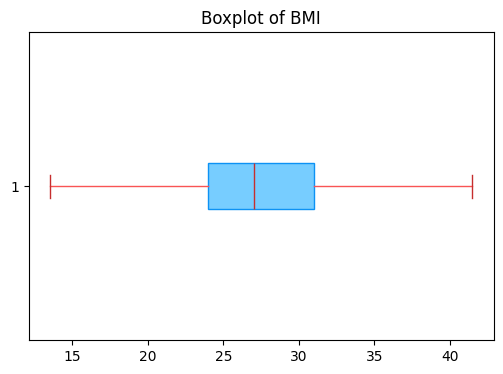

In [38]:
# Define a function to winzorize outliers
def winsorize_iqr(df, col, k=1.5):

    # Set the lower quartile and the upper quartile
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Set the lower bound and upper bound
    # Based on IQR and parameter k
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    print('Lower Bound:', lower_bound)
    print('Upper Bound:', upper_bound)

    # Replace values below/above the bounds with the boundary values
    return df[col].clip(lower=lower_bound, upper=upper_bound)

df['BMI'] = winsorize_iqr(df, 'BMI')

# Boxplot of winsorized BMI
plot_boxplot(df, 'BMI')